## Unipept lowest common ancestor peptide analysis:

### This tool returns the taxonomic lowest common ancestor for a given tryptic peptide. Here we're running all our de novo (PeaksDN), database search (Comet) and de novo-assisted database searched peptides through to determine their specificity and ability to ID organismal and functional source.

### You can run the `pept2lca` command as part of a [web server](https://unipept.ugent.be/datasets) or using the command line interface ([info here](https://unipept.ugent.be/clidocs)).

### I exported the LCA results to a .csv and placed into my /analysis/unipept directory:

In [1]:
cd /home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/unipept/

/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/unipept


In [2]:
ls

 interpro/
 med2_1_1fdr_db_nomods.jpg
 med2_1_1fdr_db_nomods.svg
 med2_1_Comet.2.5.png
 med2_1_dn_50alc_nomods.png
 med2_1_dn_80alc_nomods.png
 med2_1_dno_50alc_nomods.png
 med2_1_PeaksDN50.png
 med2_1_PeaksDN80.png
 med2_1_PepProp.90.png
 med2_2_Comet.2.5.png
 med2_2_DN50.png
 med2_2_DN80.png
 med2_2_PepProp.90.png
 MED2_combine_CometXCorr2.5_lca.csv
 MED2_combine_CometXCorr2.5_lca.ods
 MED2_combine_CometXCorr3_lca.csv
 MED2_combine_CometXCorr3_lca.ods
 MED2_combine_CometXCorr3_length_spec.csv
 MED2_combine_CometXCorr3_length_spec.ods
'med2_combined_Comet>2.5_treeview_to_Pro.png'
 med2_combined_DN50_treeview_to_Pro.png
 med2_combined_dn80.png
 med2_combined_DN80_treeview_to_Pro.png
 MED2_combine_DN50_lca.csv
 MED2_combine_DN50_lca.ods
 MED2_combine_DN50_length_spec.csv
 MED2_combine_DN50_length_spec.ods
 MED2_combine_DN80_lca.csv
 MED2_combine_DN80_lca.ods
 MED2_combine_DN80_length_spec.csv
 MED2_combine_DN80_length_spec.ods
 med2_combined_PepProp90.png
 MED2_trypsin_combine_PTMopt_Pe

In [3]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [6]:
lca50 = pd.read_csv('MED2_combine_DN50_length_spec.csv')
lca80 = pd.read_csv('MED2_combine_DN80_length_spec.csv')
lcaC3 = pd.read_csv('MED2_combine_CometXCorr3_length_spec.csv')
lca20 = pd.read_csv('MED2_trypsin_combine_PTMopt_PeaksDBpsm_20lgP_length_spec.csv')

### Visualizing the LCA results:

In [8]:
lcalen50 = lca50[['xkingdom-len', 'kingdom-len', 'phylum-len', 'species-len']].copy()    
lcalen80 = lca80[['xkingdom-len', 'kingdom-len', 'phylum-len', 'species-len']].copy()  
lcalenC3 = lcaC3[['xkingdom-len', 'kingdom-len', 'phylum-len', 'species-len']].copy()  
lcalen20 = lca20[['xkingdom-len', 'kingdom-len', 'phylum-len', 'species-len']].copy() 

/home/millieginty/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/millieginty/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.1, 'MED4 de novo peptides > 50% ALC taxonomic specificity')

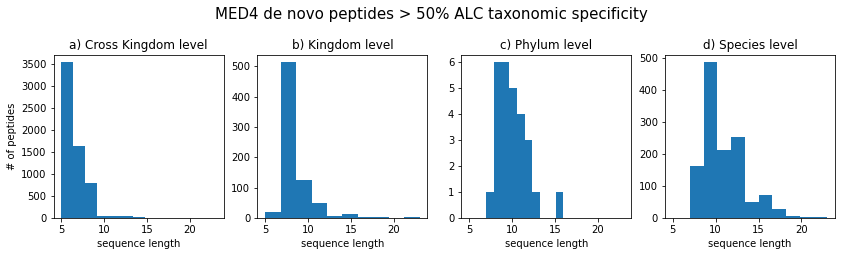

In [9]:
# plot Peaks > 50% ALC peptide taxonomic specificity per peptide length as histograms

fig, axs = plt.subplots(1, 4, figsize=(14, 3), sharex=True)


axs[0].hist(lcalen50['xkingdom-len'])
axs[0].set_title('a) Cross Kingdom level')
axs[0].set_ylabel('# of peptides')
axs[0].set_xlabel('sequence length')

axs[1].hist(lcalen50['kingdom-len'])
axs[1].set_title('b) Kingdom level')
axs[1].set_xlabel('sequence length')

axs[2].hist(lcalen50['phylum-len'])
axs[2].set_title('c) Phylum level')
axs[2].set_xlabel('sequence length')

axs[3].hist(lcalen50['species-len'])
axs[3].set_title('d) Species level')
axs[3].set_xlabel('sequence length')

fig.suptitle('MED4 de novo peptides > 50% ALC taxonomic specificity', y = 1.1, size = 15)

Text(0.5, 1.1, 'MED4 de novo peptides > 80% ALC taxonomic specificity')

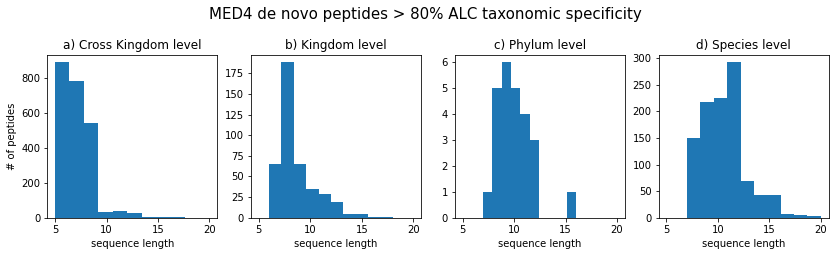

In [10]:
# plot Peaks > 80% ALC peptide taxonomic specificity per peptide length as histograms

fig, axs = plt.subplots(1, 4, figsize=(14, 3), sharex=True)


axs[0].hist(lcalen80['xkingdom-len'])
axs[0].set_title('a) Cross Kingdom level')
axs[0].set_ylabel('# of peptides')
axs[0].set_xlabel('sequence length')

axs[1].hist(lcalen80['kingdom-len'])
axs[1].set_title('b) Kingdom level')
axs[1].set_xlabel('sequence length')

axs[2].hist(lcalen80['phylum-len'])
axs[2].set_title('c) Phylum level')
axs[2].set_xlabel('sequence length')

axs[3].hist(lcalen80['species-len'])
axs[3].set_title('d) Species level')
axs[3].set_xlabel('sequence length')

fig.suptitle('MED4 de novo peptides > 80% ALC taxonomic specificity', y = 1.1, size = 15)

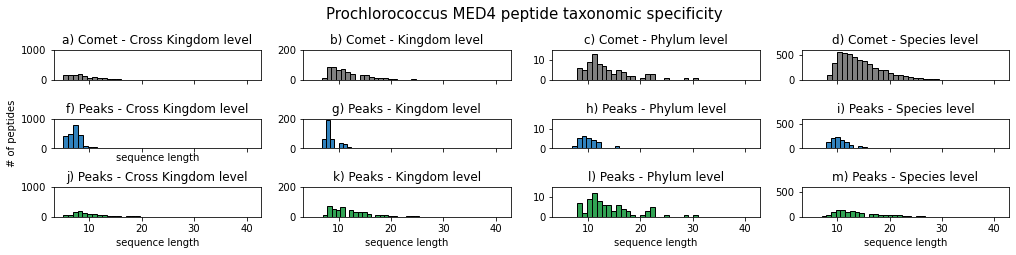

In [17]:
# plot Comet >XCorr 3 peptide taxonomic specificity per peptide length as histograms
# and plot DN80 Peaks peptides

fig, axs = plt.subplots(3, 4, figsize=(14, 3), sharex=True)

fig.tight_layout(h_pad=3)

axs[0,0].hist(lcalenC3['xkingdom-len'], bins = 25, color='grey', edgecolor = 'black')
axs[0,0].set_ylim([0,1000])
axs[0,0].set_title('a) Comet - Cross Kingdom level')
#axs[0,0].set_ylabel('# of peptides')
#axs[0,0].set_xlabel('sequence length')

axs[0,1].hist(lcalenC3['kingdom-len'], bins = 30, color='grey', edgecolor = 'black')
axs[0,1].set_ylim([0,200])
axs[0,1].set_title('b) Comet - Kingdom level')
#axs[0,1].set_xlabel('sequence length')

axs[0,2].hist(lcalenC3['phylum-len'], bins = 25, color='grey', edgecolor = 'black')
axs[0,2].set_ylim([0,15])
axs[0,2].set_title('c) Comet - Phylum level')
#axs[0,2].set_xlabel('sequence length')

axs[0,3].hist(lcalenC3['species-len'], bins = 35, color='grey', edgecolor = 'black')
axs[0,3].set_ylim([0,600])
axs[0,3].set_title('d) Comet - Species level')
#axs[0,3].set_xlabel('sequence length')

axs[1,0].hist(lcalen80['xkingdom-len'], bins = 15, color='#3182bd', edgecolor = 'black')
axs[1,0].set_ylim([0,1000])
axs[1,0].set_title('f) Peaks - Cross Kingdom level')
axs[1,0].set_ylabel('# of peptides')
axs[1,0].set_xlabel('sequence length')

axs[1,1].hist(lcalen80['kingdom-len'], bins = 15, color='#3182bd', edgecolor = 'black')
axs[1,1].set_ylim([0,200])
axs[1,1].set_title('g) Peaks - Kingdom level')
#axs[1,1].set_xlabel('sequence length')

axs[1,2].hist(lcalen80['phylum-len'], bins = 10, color='#3182bd', edgecolor = 'black')
axs[1,2].set_ylim([0,15])
axs[1,2].set_title('h) Peaks - Phylum level')
#axs[1,2].set_xlabel('sequence length')

axs[1,3].hist(lcalen80['species-len'], bins = 15, color='#3182bd', edgecolor = 'black')
axs[1,3].set_ylim([0,600])
axs[1,3].set_title('i) Peaks - Species level')
#axs[1,3].set_xlabel('sequence length')

axs[2,0].hist(lcalen20['xkingdom-len'], bins = 25, color='#31a354', edgecolor = 'black')
axs[2,0].set_ylim([0,1000])
axs[2,0].set_title('j) Peaks - Cross Kingdom level')
#axs[2,0].set_ylabel('# of peptides')
axs[2,0].set_xlabel('sequence length')

axs[2,1].hist(lcalen20['kingdom-len'], bins = 30, color='#31a354', edgecolor = 'black')
axs[2,1].set_ylim([0,200])
axs[2,1].set_title('k) Peaks - Kingdom level')
axs[2,1].set_xlabel('sequence length')

axs[2,2].hist(lcalen20['phylum-len'], bins = 25, color='#31a354', edgecolor = 'black')
axs[2,2].set_ylim([0,15])
axs[2,2].set_title('l) Peaks - Phylum level')
axs[2,2].set_xlabel('sequence length')

axs[2,3].hist(lcalen20['species-len'], bins = 30, color='#31a354', edgecolor = 'black')
axs[2,3].set_ylim([0,600])
axs[2,3].set_title('m) Peaks - Species level')
axs[2,3].set_xlabel('sequence length')

fig.suptitle('Prochlorococcus MED4 peptide taxonomic specificity', y = 1.1, size = 15)
plt.subplots_adjust(top=0.90)

plt.savefig("MED4-Comet_Peaks-taxa-hist.png")